In [52]:
### Problem 1(c) Devin Bresser ###
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 

in_data = loadmat('polydata.mat')
#loadmat() loads a matlab workspace into a python dictionary, where the names of the variables are the keys 
#in the dictionary.  To see what variables are loaded, uncomment the line below: 
#print([key for key in in_data])

#print(f"a values: {in_data['a']} \nb values: {in_data['b']}")
a = in_data['a'];
d = in_data['b'];

In [48]:
import numpy as np

def create_matrix(_a, _p):
    """
    create a matrix based on the ndarray 'a' and power 'p'
    input: list of input datapoints a, desired highest power p
    output: a matrix as shown in problem 1b.)
    
    """
    m = len(_a)
    matrix = np.zeros((m, _p+1))
    
    for i in range(m):
        for j in range(_p+1):
            matrix[i][j] = _a[i] ** j
            
    return np.around(matrix,5)

In [49]:
def least_squares(_A,_d):
    """
    find the least squares solution x0 to the set of equations Ax=d
    input: feature matrix A, result vector d
    output: least squares weight vector x0
    
    """
    x0 = np.linalg.inv(_A.T @ _A) @ _A.T @ _d
    error = np.linalg.norm(_A @ x0 - _d)
    
    return x0

In [50]:
[A_p1, A_p2, A_p3] = [create_matrix(in_data['a'],1), 
                      create_matrix(in_data['a'],2), 
                      create_matrix(in_data['a'],3)];

In [53]:
[x0_p1, x0_p2, x0_p3] = [least_squares(A_p1,d), 
                         least_squares(A_p2,d),
                         least_squares(A_p3,d)];

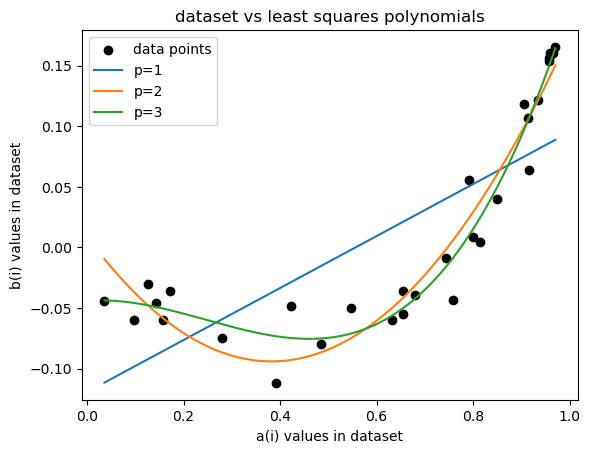

In [76]:
import matplotlib.pyplot as plt
# plot the points
plt.scatter(a,d,color="black", label="data points")

# create smooth curves along the x-axis for each polynomial
x_dense = np.linspace(min(a), max(a), 400)
# polyval requires exponents to be descending
y_p1 = np.polyval(x0_p1[::-1], x_dense)
y_p2 = np.polyval(x0_p2[::-1], x_dense)
y_p3 = np.polyval(x0_p3[::-1], x_dense)

# plot the polynomial curves
plt.plot(x_dense, y_p1, label='p=1')
plt.plot(x_dense, y_p2, label='p=2')
plt.plot(x_dense, y_p3, label='p=3')

# add plot info
plt.xlabel('a(i) values in dataset')
plt.ylabel('b(i) values in dataset')
plt.title('dataset vs least squares polynomials')
plt.legend(loc="upper left")

plt.show()
         